# 2.4 Supervised Learning - Classification Models
## *Steps:*
1. Split the dataset into training (80%) and testing (20%) sets.
2. Train the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
3. Evaluate models using:
- Accuracy, Precision, Recall, F1-score
- ROC Curve & AUC Score
## *Deliverable:*
- Trained models with performance metrics

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('../data/clean_data.csv')
pca = pd.read_csv('../data/pca_transformed_data.csv')
rfe = pd.read_csv('../data/features_selected_rfe.csv')
chi = pd.read_csv('../data/features_selected_chi.csv')
mod = pd.read_csv('../data/clean_data_before_std.csv')

In [44]:
X = data.drop(columns=['num'])
y = data['num']
Xp = data.drop(columns=['num'])
yp = data['num']
Xr = rfe.drop(columns=['num'])
yr = rfe['num']
Xc = chi.drop(columns=['num'])
yc = chi['num']
Xd = mod.drop(columns=['num'])
yd = mod ['num']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_trainp,X_testp,y_trainp,y_testp = train_test_split(Xp,yp,test_size=0.2,stratify=yp,random_state=42)
X_trainr,X_testr,y_trainr,y_testr = train_test_split(Xr,yr,test_size=0.2,stratify=yr,random_state=42)
X_trainc,X_testc,y_trainc,y_testc = train_test_split(Xc,yc,test_size=0.2,stratify=yc,random_state=42)
X_traind,X_testd,y_traind,y_testd = train_test_split(Xd,yd,test_size=0.2,stratify=y,random_state=42)

In [46]:
models = {
    'logistic regression':LogisticRegression(),
    'Decision tree':DecisionTreeClassifier(),
    'Random forest':RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [47]:
performance = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine']
})
a = []
b = []
c = []
d = []
results_a = []
results_b = []
results_c = []
results_d = []

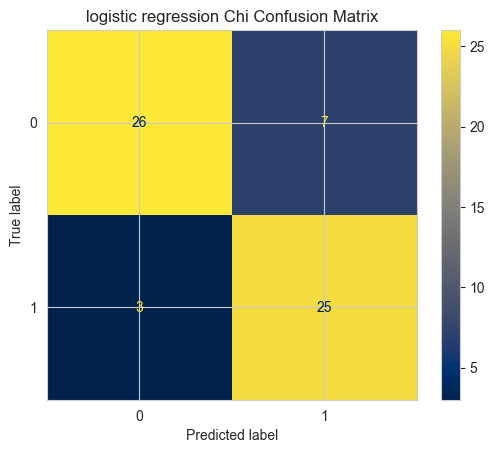

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

logistic regression: train acc: 83.47%, accuracy: 83.61%


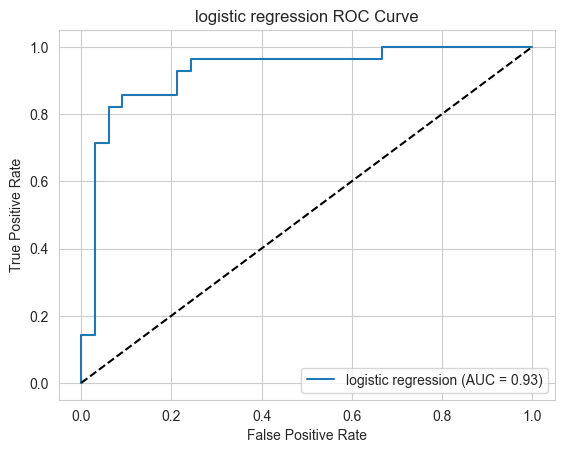

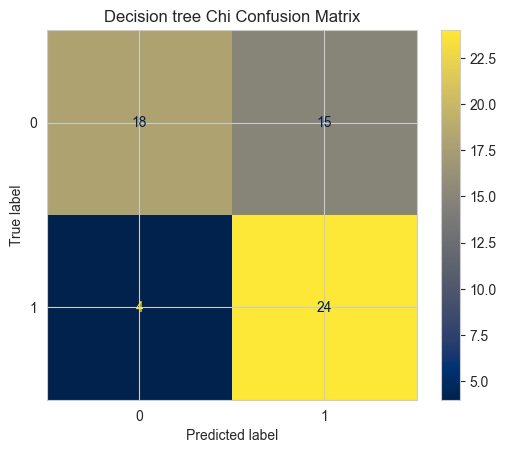

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.65        33
           1       0.62      0.86      0.72        28

    accuracy                           0.69        61
   macro avg       0.72      0.70      0.69        61
weighted avg       0.73      0.69      0.68        61

Decision tree: train acc: 100.00%, accuracy: 68.85%


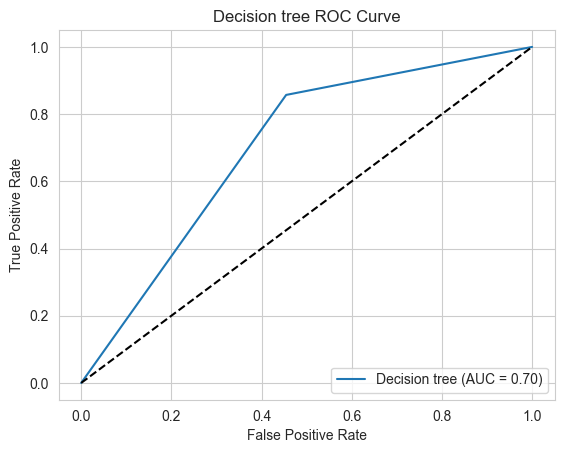

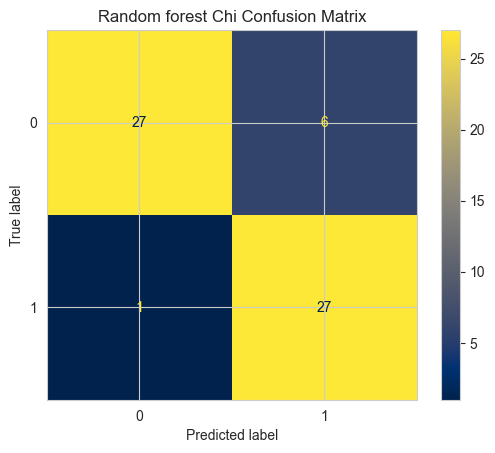

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61

Random forest: train acc: 100.00%, accuracy: 88.52%


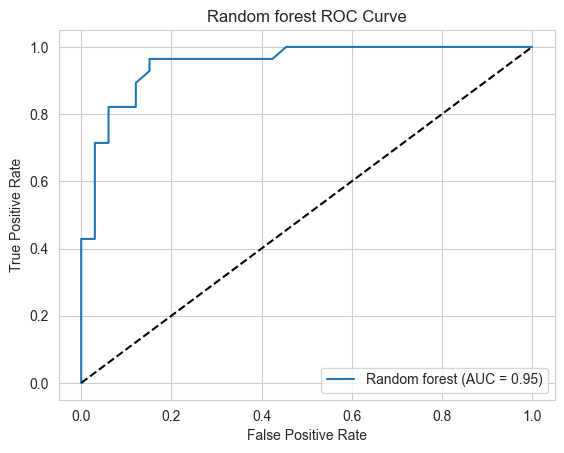

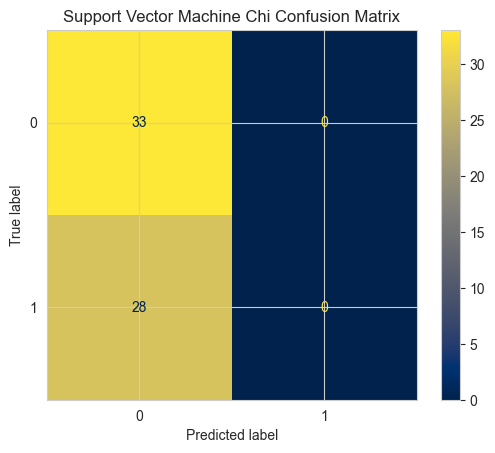

Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Support Vector Machine: train acc: 54.13%, accuracy: 54.10%


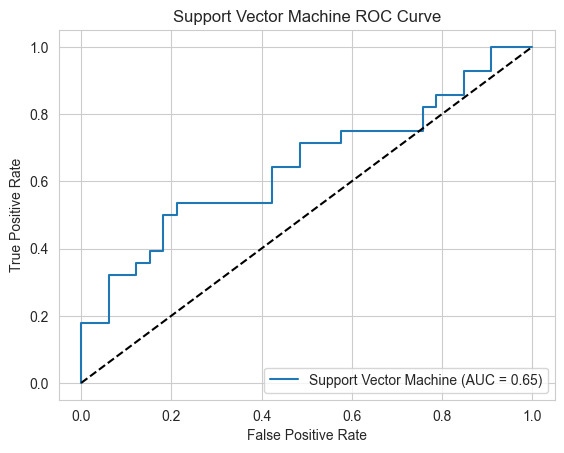


Performance Summary:
                     Model Train Accuracy Test Accuracy   AUC
0     logistic regression         83.47%        83.61%  0.93
1           Decision tree        100.00%        68.85%  0.70
2           Random forest        100.00%        88.52%  0.95
3  Support Vector Machine         54.13%        54.10%  0.65


In [48]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    cm = confusion_matrix(y_test, pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.cividis)
    plt.title(model_name + ' Chi Confusion Matrix')
    plt.show()

    print('Classification Report:\n', classification_report(y_test, pred))

    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')
    if len(model.classes_) == 2:
        if hasattr(model, "predict_proba"):
            # if the model supports probability prediction
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
             # fallback for models like SVC without probability=True
             y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        roc_auc = None
        print(f"{model_name}: ROC/AUC only supported for binary classification.")
    # Save metrics
    a.append(f"{test_acc:.2f}%")
    results_a.append({
        "Model": model_name,
        "Train Accuracy": f"{train_acc:.2f}%",
        "Test Accuracy": f"{test_acc:.2f}%",
        "AUC": f"{roc_auc:.2f}" if roc_auc is not None else "N/A"
    })

performance['Test Accuracy'] = a
performance_df = pd.DataFrame(results_a)
print("\nPerformance Summary:\n", performance_df)


## Accuracy vs. RFE Features


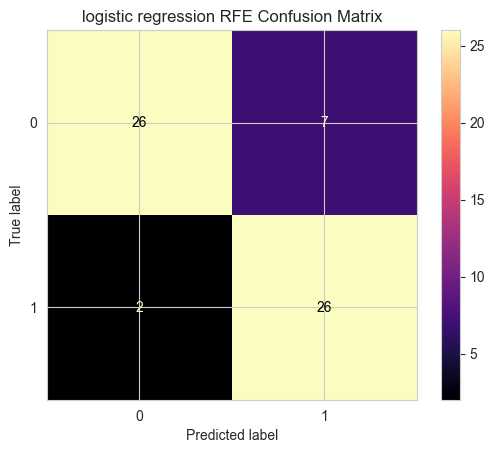

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

logistic regression: train acc: 83.06%, accuracy: 85.25%


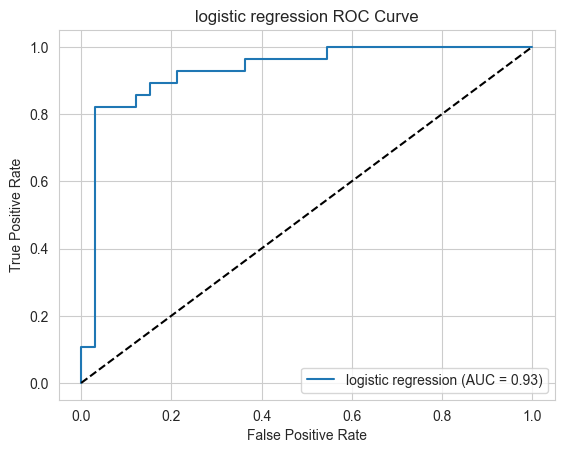

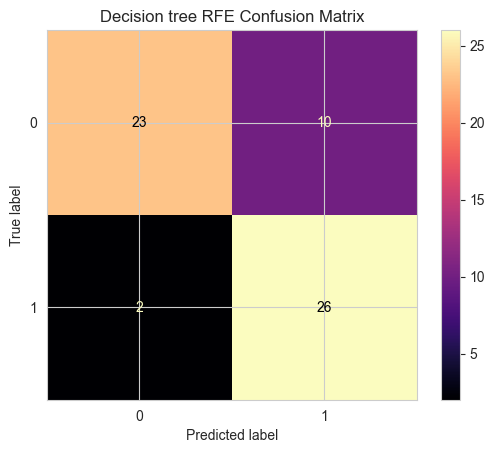

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.79        33
           1       0.72      0.93      0.81        28

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

Decision tree: train acc: 100.00%, accuracy: 80.33%


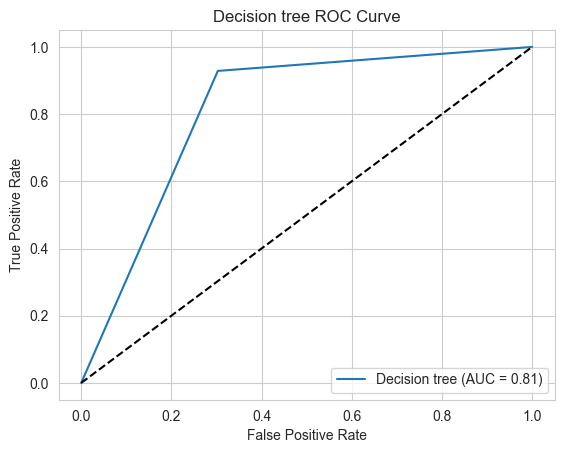

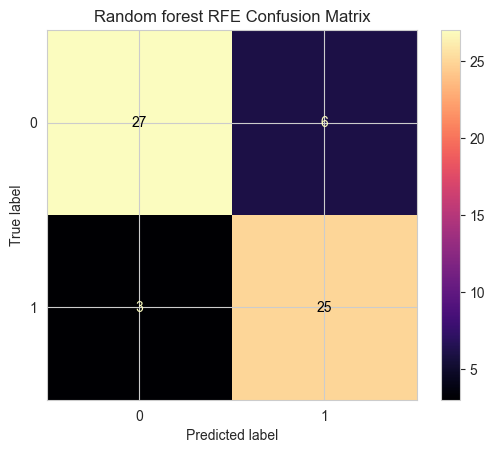

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Random forest: train acc: 100.00%, accuracy: 85.25%


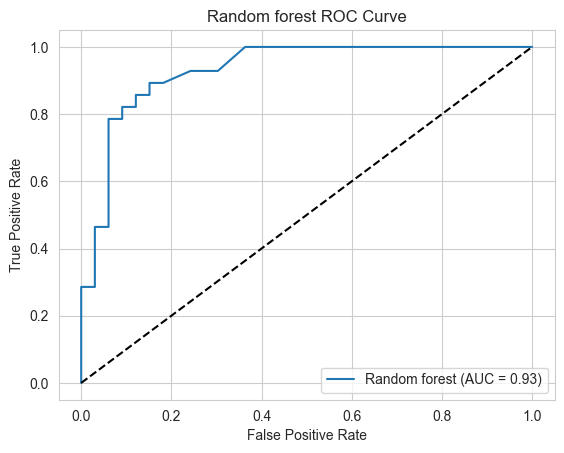

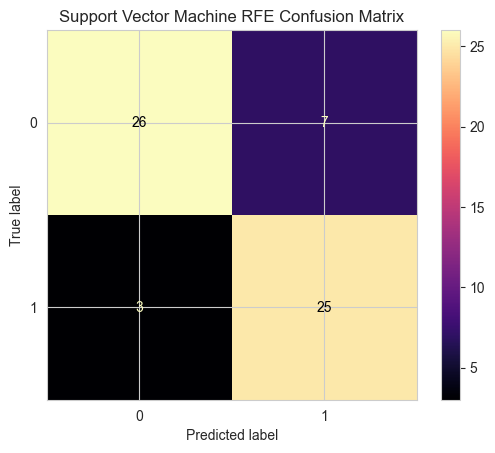

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Support Vector Machine: train acc: 84.30%, accuracy: 83.61%


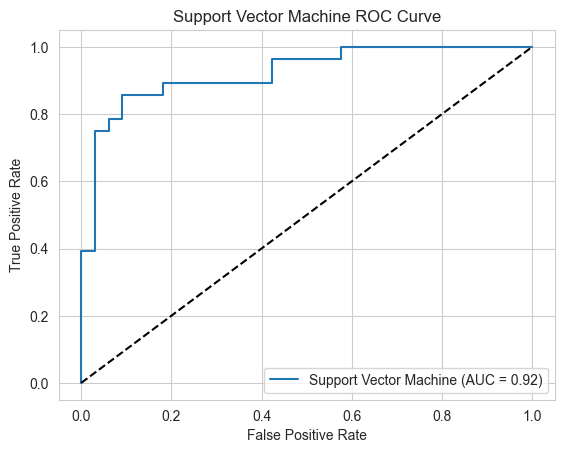


Performance Summary:
                     Model Train Accuracy Test Accuracy   AUC
0     logistic regression         83.06%        85.25%  0.93
1           Decision tree        100.00%        80.33%  0.81
2           Random forest        100.00%        85.25%  0.93
3  Support Vector Machine         84.30%        83.61%  0.92


In [49]:
for model_name, model in models.items():
    model.fit(X_trainr, y_trainr)
    pred = model.predict(X_testr)

    cm = confusion_matrix(y_testr, pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.magma)
    plt.title(model_name + ' RFE Confusion Matrix')
    plt.show()

    print('Classification Report:\n', classification_report(y_testr, pred))

    train_acc = accuracy_score(y_trainr, model.predict(X_trainr)) * 100
    test_acc = accuracy_score(y_testr, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')

    if len(model.classes_) == 2:
        if hasattr(model, "predict_proba"):
            # if the model supports probability prediction
            y_prob = model.predict_proba(X_testr)[:, 1]
        else:
            # fallback for models like SVC without probability=True
            y_prob = model.decision_function(X_testr)

        fpr, tpr, _ = roc_curve(y_testr, y_prob, pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        roc_auc = None
        print(f"{model_name}: ROC/AUC only supported for binary classification.")

    # Save metrics
    b.append(f"{test_acc:.2f}%")
    results_b.append({
        "Model": model_name,
        "Train Accuracy": f"{train_acc:.2f}%",
        "Test Accuracy": f"{test_acc:.2f}%",
        "AUC": f"{roc_auc:.2f}" if roc_auc is not None else "N/A"
    })

performance['RFE feat. Acc.'] = b
performance_df = pd.DataFrame(results_b)
print("\nPerformance Summary:\n", performance_df)


## Accuracy vs. Chi Features

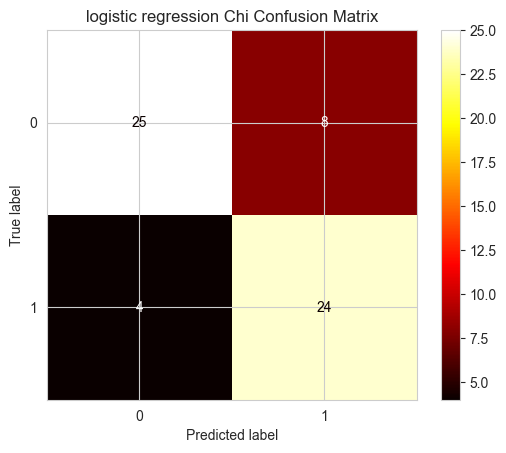

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.75      0.86      0.80        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

logistic regression: train acc: 84.71%, accuracy: 80.33%


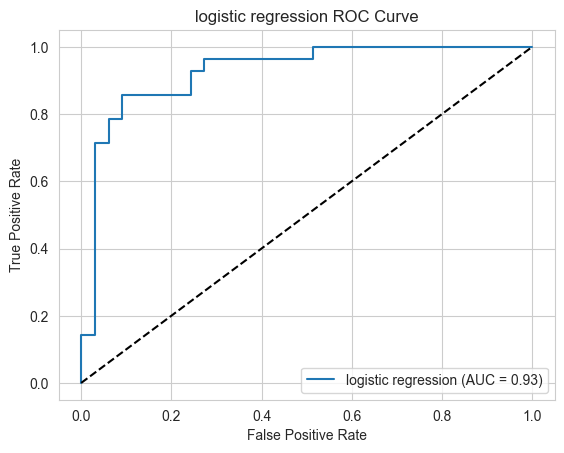

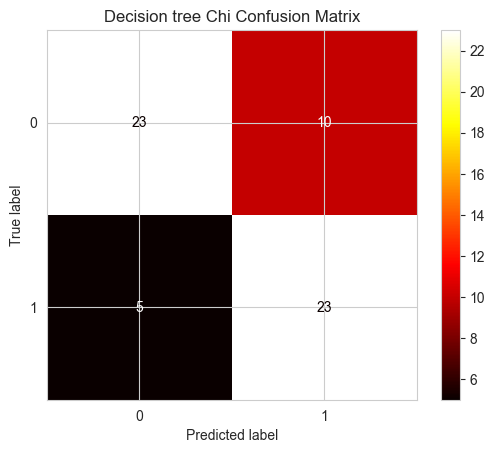

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.70      0.82      0.75        28

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

Decision tree: train acc: 97.52%, accuracy: 75.41%


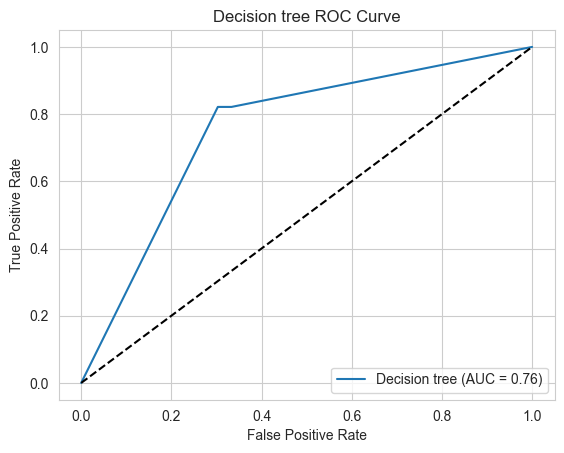

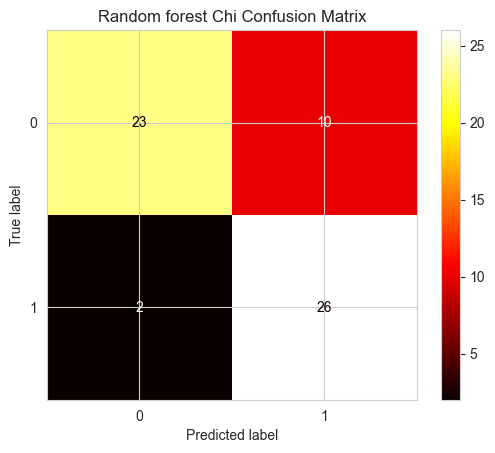

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.79        33
           1       0.72      0.93      0.81        28

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

Random forest: train acc: 97.52%, accuracy: 80.33%


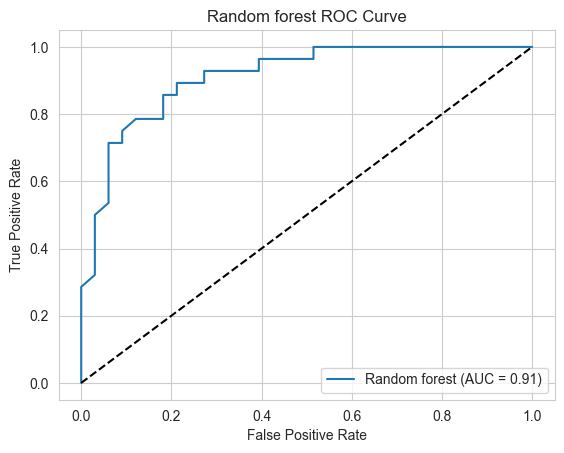

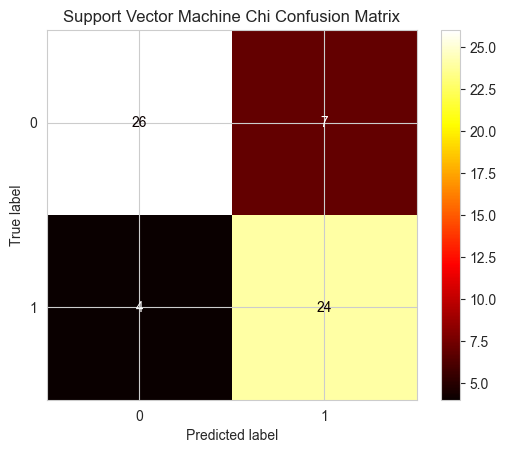

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Support Vector Machine: train acc: 86.36%, accuracy: 81.97%


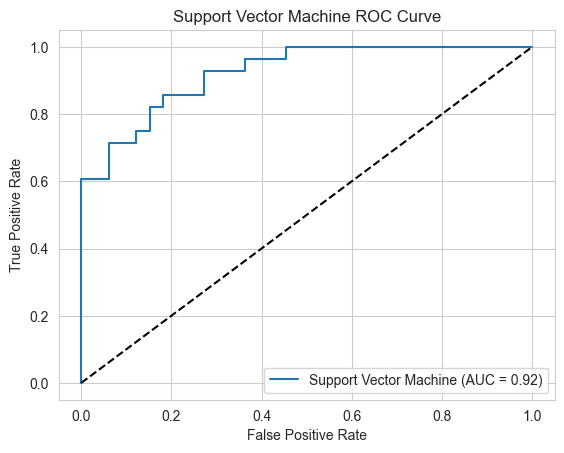


Performance Summary:
                     Model Train Accuracy Test Accuracy   AUC
0     logistic regression         84.71%        80.33%  0.93
1           Decision tree         97.52%        75.41%  0.76
2           Random forest         97.52%        80.33%  0.91
3  Support Vector Machine         86.36%        81.97%  0.92


In [50]:
for model_name, model in models.items():
    model.fit(X_trainc, y_trainc)
    pred = model.predict(X_testc)

    # Confusion Matrix
    cm = confusion_matrix(y_testc, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.hot)
    plt.title(model_name + ' Chi Confusion Matrix')
    plt.show()

    # Classification report
    print('Classification Report:\n', classification_report(y_testc, pred))

    # Accuracy
    train_acc = accuracy_score(y_trainc, model.predict(X_trainc)) * 100
    test_acc = accuracy_score(y_testc, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')

    # ROC & AUC (only for binary classification)
    if len(model.classes_) == 2:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_testc)[:, 1]
        else:
            y_prob = model.decision_function(X_testc)

        fpr, tpr, _ = roc_curve(y_testc, y_prob, pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        roc_auc = None
        print(f"{model_name}: ROC/AUC only supported for binary classification.")

    # Save metrics
    c.append(f"{test_acc:.2f}%")
    results_c.append({
        "Model": model_name,
        "Train Accuracy": f"{train_acc:.2f}%",
        "Test Accuracy": f"{test_acc:.2f}%",
        "AUC": f"{roc_auc:.2f}" if roc_auc is not None else "N/A"
    })

# Save results in summary DataFrame
performance['Chi feat. Acc.'] = c
performance_df = pd.DataFrame(results_c)
print("\nPerformance Summary:\n", performance_df)


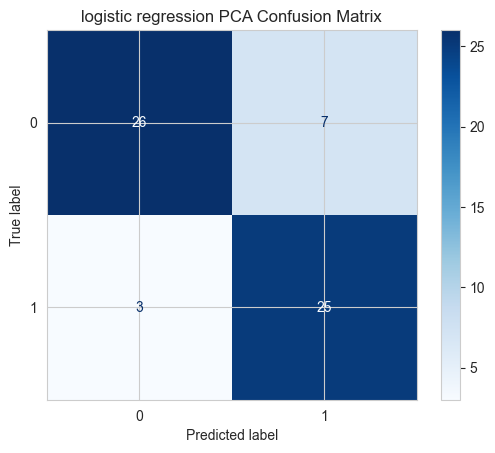

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

logistic regression: train acc: 83.47%, accuracy: 83.61%


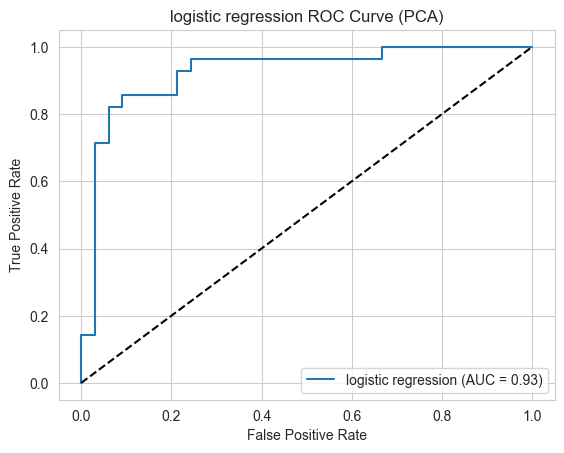

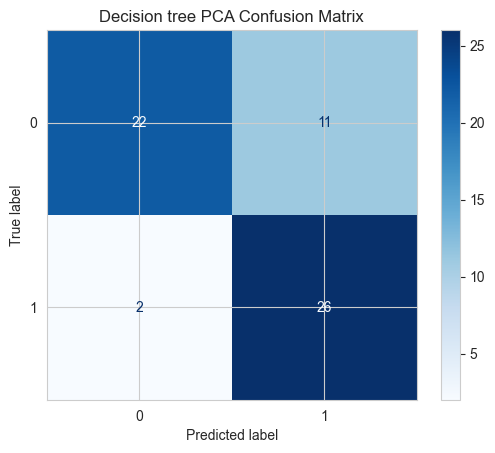

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.77        33
           1       0.70      0.93      0.80        28

    accuracy                           0.79        61
   macro avg       0.81      0.80      0.79        61
weighted avg       0.82      0.79      0.78        61

Decision tree: train acc: 100.00%, accuracy: 78.69%


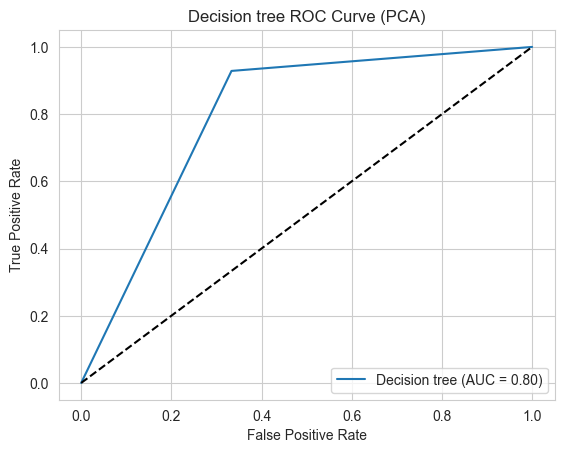

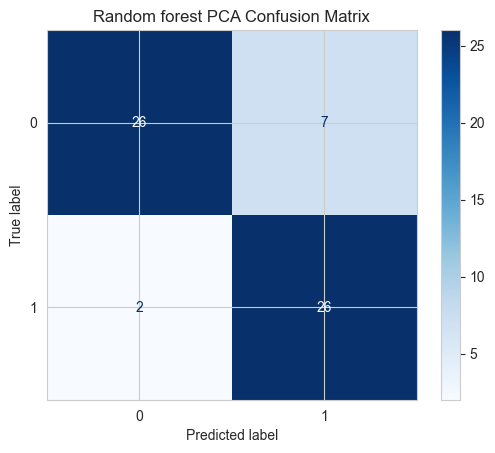

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Random forest: train acc: 100.00%, accuracy: 85.25%


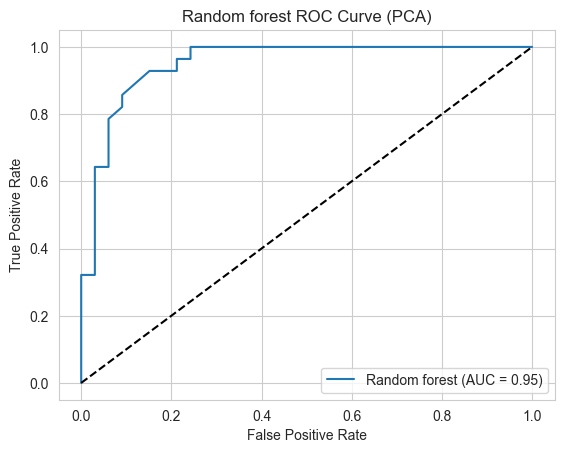

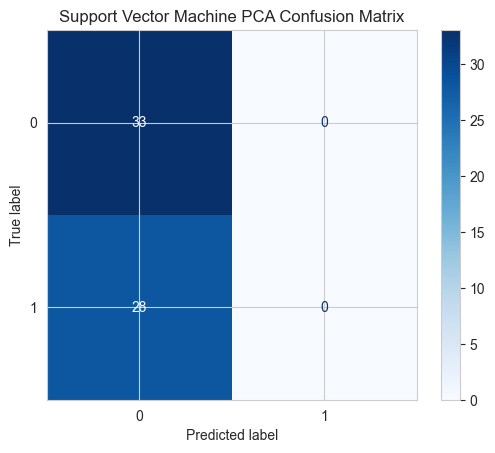

Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Support Vector Machine: train acc: 54.13%, accuracy: 54.10%


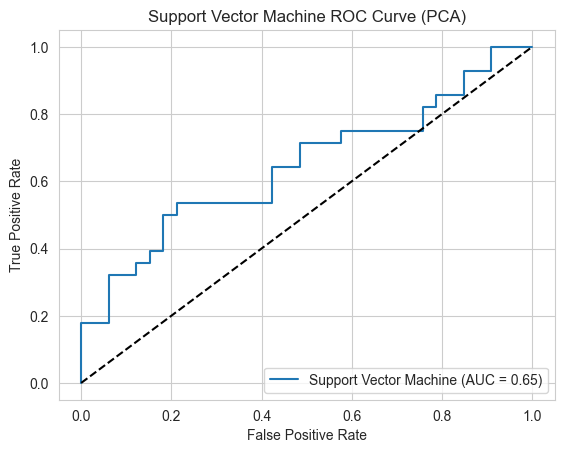


Performance Summary:
                     Model Train Accuracy Test Accuracy   AUC
0     logistic regression         83.47%        83.61%  0.93
1           Decision tree        100.00%        78.69%  0.80
2           Random forest        100.00%        85.25%  0.95
3  Support Vector Machine         54.13%        54.10%  0.65


In [51]:
for model_name, model in models.items():
    model.fit(X_trainp, y_trainp)
    pred = model.predict(X_testp)

    # Confusion Matrix
    cm = confusion_matrix(y_testp, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name + ' PCA Confusion Matrix')
    plt.show()

    # Classification Report
    print('Classification Report:\n', classification_report(y_testp, pred))

    # Accuracy
    train_acc = accuracy_score(y_trainp, model.predict(X_trainp)) * 100
    test_acc = accuracy_score(y_testp, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')

    # ROC & AUC (binary classifiers only)
    if len(model.classes_) == 2:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_testp)[:, 1]
        else:
            y_prob = model.decision_function(X_testp)

        fpr, tpr, _ = roc_curve(y_testp, y_prob, pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name + ' ROC Curve (PCA)')
        plt.legend(loc="lower right")
        plt.show()
    else:
        roc_auc = None
        print(f"{model_name}: ROC/AUC only supported for binary classification.")

    # Save metrics
    d.append(f"{test_acc:.2f}%")
    results_d.append({
        "Model": model_name,
        "Train Accuracy": f"{train_acc:.2f}%",
        "Test Accuracy": f"{test_acc:.2f}%",
        "AUC": f"{roc_auc:.2f}" if roc_auc is not None else "N/A"
    })

# Save results in performance summary
performance['PCA feat. Acc.'] = d
performance_df = pd.DataFrame(results_d)
print("\nPerformance Summary:\n", performance_df)


## Performance Comparison

In [52]:
performance

,Model,Test Accuracy,RFE feat. Acc.,Chi feat. Acc.,PCA feat. Acc.
0,Logistic Regression,83.61%,85.25%,80.33%,83.61%
1,Decision Tree,68.85%,80.33%,75.41%,78.69%
2,Random Forest,88.52%,85.25%,80.33%,85.25%
3,Support Vector Machine,54.10%,83.61%,81.97%,54.10%


In [53]:
thal_map = {3: 0, 6: 1, 7: 2}
data['thal'] = data['thal'].map(thal_map)

selected_features = ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']

# Train model on only these features
X_train_sel = X_traind[selected_features]
X_test_sel = X_testd[selected_features]

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sel, y_traind)

# Save model + selected features
joblib.dump({"model": rf_model, "features": selected_features},
            "../models/best_modell.pkl")

print("✅ Model trained and saved with manually selected features")

✅ Model trained and saved with manually selected features


# ROC Curve Analysis for All Classifiers

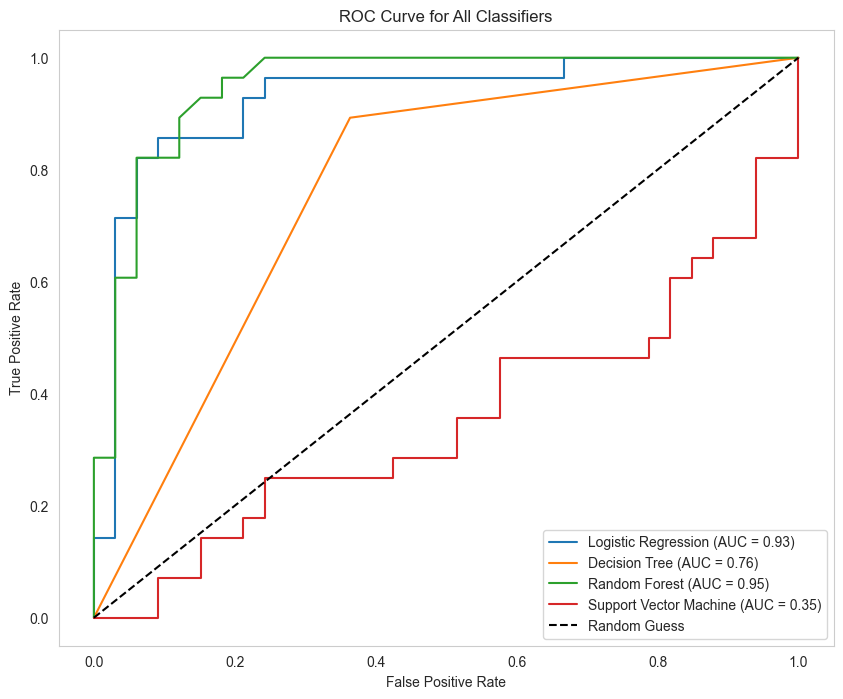

In [54]:
plt.figure(figsize=(10, 8))
models = {
   'Logistic Regression': LogisticRegression(),
   'Decision Tree': DecisionTreeClassifier(),
   'Random Forest': RandomForestClassifier(),
   'Support Vector Machine': SVC(probability=True)  # set probability=True for SVM
}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Get predicted probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Why SVM shows false positives

I've re-encoded `thal` as an **ordinal variable** (3 → 0, 6 → 1, 7 → 2).

- This works fine for **tree-based models** like `RandomForestClassifier` because **trees don’t assume linear relationships** between feature values.
- **However, for SVM (and Logistic Regression)**, this encoding can mislead the model. SVM treats numeric differences as meaningful, which can increase **false positives**.

### Solution
1. Use **one-hot encoding** for categorical features like `thal` and `cp`.
2. **Scale all features** before training SVM or Logistic Regression.

This ensures SVM interprets the categories correctly and reduces false positives.
